<a href="https://colab.research.google.com/github/viswambhar-yasa/Pizza_Vs_Streak-/blob/main/pizza_Vs_steak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pizza Vs Steak
The prediction of the images of most common food. Let's check if our Convolution NN is able to predict if it's pizza or steak.

In [2]:
# Importing important libraries 

In [3]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print('TensorFlow Version')
tf.__version__

TensorFlow Version


'2.5.0'

#### Importing zip file into tensorflow 

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-08-12 00:44:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   132MB/s    in 0.8s    

2021-08-12 00:44:50 (132 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



### Extracting the imported zip file 

In [6]:
import zipfile as Z

In [7]:
datafile=Z.ZipFile("pizza_steak.zip")
datafile.extractall()
datafile.close()

In [8]:
!ls

__MACOSX  pizza_steak  pizza_steak.zip	sample_data


In [9]:
!ls pizza_steak

test  train


In [10]:
!ls pizza_steak/train

pizza  steak


In [11]:
for dirpath, dirnames, filenames in os.walk('./pizza_steak'):
  print(dirpath)
  print("Number of directories",len(dirnames),':',dirnames)
  print('Number of file in sub-dire',len(filenames),'\n')

./pizza_steak
Number of directories 2 : ['test', 'train']
Number of file in sub-dire 1 

./pizza_steak/test
Number of directories 2 : ['pizza', 'steak']
Number of file in sub-dire 1 

./pizza_steak/test/pizza
Number of directories 0 : []
Number of file in sub-dire 250 

./pizza_steak/test/steak
Number of directories 0 : []
Number of file in sub-dire 250 

./pizza_steak/train
Number of directories 2 : ['pizza', 'steak']
Number of file in sub-dire 1 

./pizza_steak/train/pizza
Number of directories 0 : []
Number of file in sub-dire 750 

./pizza_steak/train/steak
Number of directories 0 : []
Number of file in sub-dire 750 



In [12]:
class_labels=list(np.sort([x for x in os.listdir('pizza_steak/train/')]))
labels=class_labels[1:]

#### Extracting images from tensorflow directories into tensorflow object or importing images into tensorflow environment 

In [13]:
img_height=225
img_width=225
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'pizza_steak/train/',
  validation_split=0.2,
  subset="training",
  seed=60,
  image_size=(img_height, img_width),
  batch_size=32)

Found 1500 files belonging to 2 classes.
Using 1200 files for training.


In [14]:
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'pizza_steak/train/',
  validation_split=0.2,
  subset="validation",
  seed=60,
  image_size=(img_height, img_width),
  batch_size=32)

Found 1500 files belonging to 2 classes.
Using 300 files for validation.


In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 225, 225, 3)
(32,)


In [16]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'pizza_steak/test/',
  seed=60,
  image_size=(img_height, img_width),
  batch_size=32)

Found 500 files belonging to 2 classes.


In [17]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 225, 225, 3)
(32,)


In [18]:
trn_ds_len=len(train_ds)
val_ds_len=len(valid_ds)
test_ds_len=len(test_ds)

#### Data Augumentation i.e performing action like rotation,cropping on training dataset so as to create more number of training examples to avoid overfitting

In [19]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling,RandomRotation,RandomFlip,Resizing
Resizing_layer=Resizing(225,225)
Normalization_layer=Rescaling(1./225)
Rotation_layer=RandomRotation(factor=(-0.3,0.3))
Flip_layer=RandomFlip()

In [20]:
Data_augmentation=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0.2, 
                                                                  width_shift_range=0.0, 
                                                                  height_shift_range=0.0,
                                                                  brightness_range=None, 
                                                                  shear_range=0.2,
                                                                  zoom_range=0.3, 
                                                                  horizontal_flip=True, 
                                                                  vertical_flip=True, 
                                                                  preprocessing_function=None)

In [21]:
trn_agument_ds=Data_augmentation.flow_from_directory("./pizza_steak/train/",
                                                     class_mode='binary',
                                                     batch_size=32,
                                                     shuffle=True)

Found 1500 images belonging to 2 classes.


In [22]:
food_model_1=tf.keras.Sequential([
                                  Resizing_layer,
                                  Normalization_layer,
                                  tf.keras.layers.Conv2D(10,3,input_shape=(225,225,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [23]:
food_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.binary_crossentropy,metrics='accuracy')

In [24]:
food_model_hist1=food_model_1.fit(train_ds,batch_size=32,
                                  steps_per_epoch=trn_ds_len,
                                  validation_data=valid_ds,
                                  validation_steps=len(valid_ds)
                                  ,epochs=10)

Epoch 1/10
38/38 [==============================] - 35s 79ms/step - loss: 0.6596 - accuracy: 0.7075 - val_loss: 0.5516 - val_accuracy: 0.7500
Epoch 2/10
38/38 [==============================] - 3s 71ms/step - loss: 0.4159 - accuracy: 0.8108 - val_loss: 0.4053 - val_accuracy: 0.8167
Epoch 3/10
38/38 [==============================] - 3s 77ms/step - loss: 0.3252 - accuracy: 0.8717 - val_loss: 0.4013 - val_accuracy: 0.8200
Epoch 4/10
38/38 [==============================] - 3s 77ms/step - loss: 0.2411 - accuracy: 0.9225 - val_loss: 0.4895 - val_accuracy: 0.7767
Epoch 5/10
38/38 [==============================] - 3s 76ms/step - loss: 0.1749 - accuracy: 0.9492 - val_loss: 0.4251 - val_accuracy: 0.8167
Epoch 6/10
38/38 [==============================] - 3s 76ms/step - loss: 0.1176 - accuracy: 0.9750 - val_loss: 0.4337 - val_accuracy: 0.8100
Epoch 7/10
38/38 [==============================] - 3s 75ms/step - loss: 0.0733 - accuracy: 0.9892 - val_loss: 0.5004 - val_accuracy: 0.8100
Epoch 8/10
3

In [25]:
loss1,accuracy1=food_model_1.evaluate(test_ds)

16/16 [==============================] - 1s 41ms/step - loss: 0.3905 - accuracy: 0.8500


In [26]:
print('The accuracy of model-1 on test dataset', np.round(accuracy1*100,3))

The accuracy of model-1 on test dataset 85.0


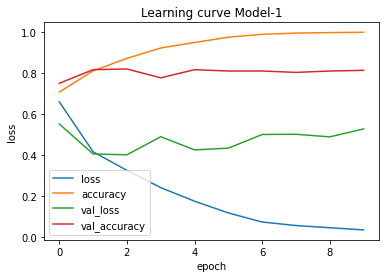

In [27]:
import pandas as pd
pd.DataFrame(food_model_hist1.history).plot(title='Learning curve Model-1',xlabel='epoch',ylabel='loss')

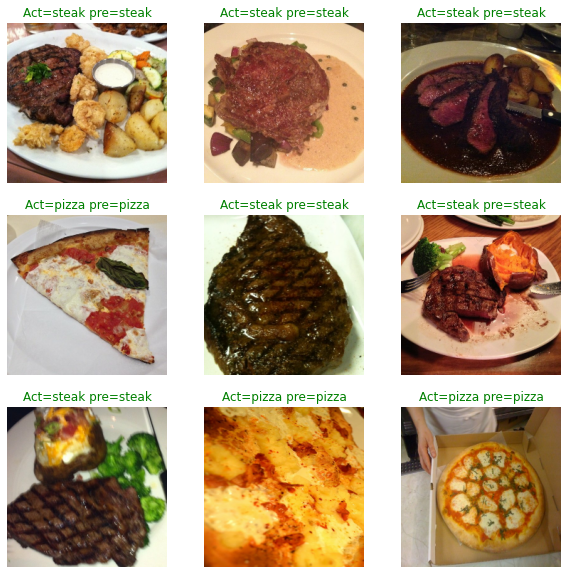

In [28]:
r=3
c=3
plt.figure(figsize=(10,10))
image,label=next(iter(test_ds))
for i in range(r*c):
  n=int(np.random.randint(0,32,1))
  ax=plt.subplot(r,c,i+1)
  plt.imshow(image[n,:,:,:].numpy().astype("uint8"))
  predicted_label=food_model_1.predict(image)
  index=int(np.max(np.round(predicted_label[n])))
  if labels[label[int(n)]]==labels[index]:
    plt.title('Act='+labels[label[int(n)]]+' pre='+labels[index],color="green")
  else:
    plt.title('Act='+labels[label[int(n)]]+' pre='+labels[index],color="red")
  plt.axis("off")

In [29]:
food_model_2=tf.keras.Sequential([
                                  Resizing_layer,
                                  Normalization_layer,
                                  tf.keras.layers.Conv2D(10,3,input_shape=(225,225,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(),
                                  tf.keras.layers.Conv2D(10,3,activation='relu'),
                                  tf.keras.layers.Conv2D(10,3,activation='relu'),
                                  tf.keras.layers.MaxPool2D(),
                                  tf.keras.layers.Conv2D(10,3,activation='relu'),
                                  tf.keras.layers.Conv2D(10,3,activation='relu'),
                                  tf.keras.layers.MaxPool2D(),
                                  tf.keras.layers.Conv2D(10,3,activation='relu'),
                                  tf.keras.layers.Conv2D(10,3,activation='relu'),
                                  tf.keras.layers.MaxPool2D(),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(20,activation='relu'),
                                  tf.keras.layers.Dense(10,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [30]:
food_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.binary_crossentropy,metrics='accuracy')

In [31]:
food_model_callback2=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [32]:
food_model_hist2=food_model_2.fit(train_ds,batch_size=32,
                                  steps_per_epoch=trn_ds_len,
                                  validation_data=valid_ds,
                                  validation_steps=len(valid_ds),
                                  callbacks=food_model_callback2
                                  ,epochs=10)

Epoch 1/10
38/38 [==============================] - 5s 92ms/step - loss: 0.6735 - accuracy: 0.5783 - val_loss: 0.5992 - val_accuracy: 0.7233
Epoch 2/10
38/38 [==============================] - 3s 77ms/step - loss: 0.5541 - accuracy: 0.7275 - val_loss: 0.4735 - val_accuracy: 0.7767
Epoch 3/10
38/38 [==============================] - 3s 81ms/step - loss: 0.4621 - accuracy: 0.7983 - val_loss: 0.4389 - val_accuracy: 0.7900
Epoch 4/10
38/38 [==============================] - 3s 81ms/step - loss: 0.4367 - accuracy: 0.8067 - val_loss: 0.4338 - val_accuracy: 0.8167
Epoch 5/10
38/38 [==============================] - 3s 82ms/step - loss: 0.4201 - accuracy: 0.8083 - val_loss: 0.4000 - val_accuracy: 0.8333
Epoch 6/10
38/38 [==============================] - 3s 81ms/step - loss: 0.4012 - accuracy: 0.8233 - val_loss: 0.3834 - val_accuracy: 0.8433
Epoch 7/10
38/38 [==============================] - 3s 81ms/step - loss: 0.3947 - accuracy: 0.8333 - val_loss: 0.4038 - val_accuracy: 0.8267
Epoch 8/10
38

In [33]:
loss2,accuracy2=food_model_2.evaluate(test_ds)

16/16 [==============================] - 1s 43ms/step - loss: 0.3479 - accuracy: 0.8600


In [34]:
print('The accuracy of model-2 on test dataset', np.round(accuracy2*100,3))

The accuracy of model-2 on test dataset 85.0


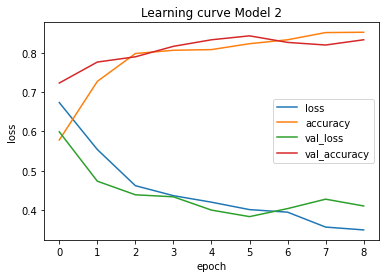

In [35]:
pd.DataFrame(food_model_hist2.history).plot(title='Learning curve Model 2',xlabel='epoch',ylabel='loss')

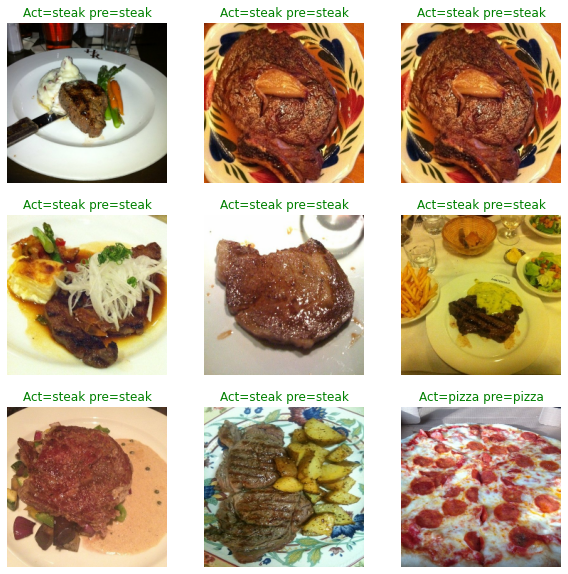

In [36]:
r=3
c=3
plt.figure(figsize=(10,10))
image,label=next(iter(test_ds))
for i in range(r*c):
  n=int(np.random.randint(0,32,1))
  ax=plt.subplot(r,c,i+1)
  plt.imshow(image[n,:,:,:].numpy().astype("uint8"))
  predicted_label=food_model_2.predict(image)
  index=int(np.max(np.round(predicted_label[n])))
  if labels[label[int(n)]]==labels[index]:
    plt.title('Act='+labels[label[int(n)]]+' pre='+labels[index],color="green")
  else:
    plt.title('Act='+labels[label[int(n)]]+' pre='+labels[index],color="red")
  plt.axis("off")

### Fitting our Model-2 with 87% accuracy on augumented data

In [37]:
food_model_agum_hist2=food_model_2.fit(trn_agument_ds,batch_size=32,
                                  steps_per_epoch=len(trn_agument_ds),
                                  validation_data=test_ds,
                                  validation_steps=len(test_ds),
                                  callbacks=food_model_callback2
                                  ,epochs=10)

Epoch 1/10
47/47 [==============================] - 27s 566ms/step - loss: 0.4337 - accuracy: 0.8200 - val_loss: 0.3402 - val_accuracy: 0.8700
Epoch 2/10
47/47 [==============================] - 25s 532ms/step - loss: 0.4146 - accuracy: 0.8147 - val_loss: 0.3303 - val_accuracy: 0.8740
Epoch 3/10
47/47 [==============================] - 25s 536ms/step - loss: 0.4061 - accuracy: 0.8327 - val_loss: 0.3402 - val_accuracy: 0.8720
Epoch 4/10
47/47 [==============================] - 25s 536ms/step - loss: 0.3967 - accuracy: 0.8307 - val_loss: 0.3140 - val_accuracy: 0.8680
Epoch 5/10
47/47 [==============================] - 26s 547ms/step - loss: 0.4208 - accuracy: 0.8060 - val_loss: 0.3623 - val_accuracy: 0.8620
Epoch 6/10
47/47 [==============================] - 24s 514ms/step - loss: 0.3812 - accuracy: 0.8273 - val_loss: 0.4528 - val_accuracy: 0.8100
Epoch 7/10
47/47 [==============================] - 25s 539ms/step - loss: 0.3939 - accuracy: 0.8307 - val_loss: 0.3480 - val_accuracy: 0.8880

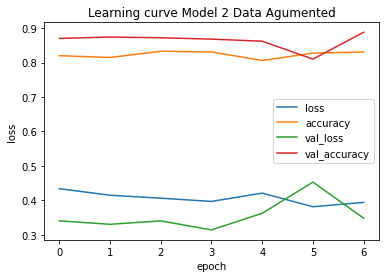

In [38]:
pd.DataFrame(food_model_agum_hist2.history).plot(title='Learning curve Model 2 Data Agumented',xlabel='epoch',ylabel='loss')

In [39]:
!wget https://www.delonghi.com/Global/recipes/multifry/pizza_fresca.jpg

--2021-08-12 00:49:59--  https://www.delonghi.com/Global/recipes/multifry/pizza_fresca.jpg
Resolving www.delonghi.com (www.delonghi.com)... 104.90.117.113
Connecting to www.delonghi.com (www.delonghi.com)|104.90.117.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘pizza_fresca.jpg’

pizza_fresca.jpg        [ <=>                ] 172.41K  --.-KB/s    in 0.02s   

2021-08-12 00:49:59 (6.76 MB/s) - ‘pizza_fresca.jpg’ saved [176552]



(-0.5, 1279.5, 879.5, -0.5)

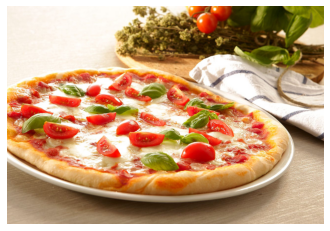

In [40]:
from matplotlib.image import imread
pizza=imread('./pizza_fresca.jpg')
plt.imshow(pizza)
plt.axis('off')

In [41]:
print('Shape of the image',pizza.shape)
pizza_re=tf.expand_dims(pizza,axis=0)
print('Reshaped image to fit out model',pizza_re.shape)

Shape of the image (880, 1280, 3)
Reshaped image to fit out model (1, 880, 1280, 3)


In [42]:
predicted_val=food_model_2.predict(pizza_re)

In [43]:
print(labels[int(predicted_val)])

pizza


In [44]:
!wget https://www.jessicagavin.com/wp-content/uploads/2018/06/how-to-reverse-sear-a-steak-11-1200.jpg

--2021-08-12 00:50:00--  https://www.jessicagavin.com/wp-content/uploads/2018/06/how-to-reverse-sear-a-steak-11-1200.jpg
Resolving www.jessicagavin.com (www.jessicagavin.com)... 141.193.213.21, 141.193.213.20
Connecting to www.jessicagavin.com (www.jessicagavin.com)|141.193.213.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107577 (105K) [image/jpeg]
Saving to: ‘how-to-reverse-sear-a-steak-11-1200.jpg’

how-to-reverse-sear 100%[===================>] 105.06K  --.-KB/s    in 0.01s   

2021-08-12 00:50:00 (7.45 MB/s) - ‘how-to-reverse-sear-a-steak-11-1200.jpg’ saved [107577/107577]



(-0.5, 1199.5, 1199.5, -0.5)

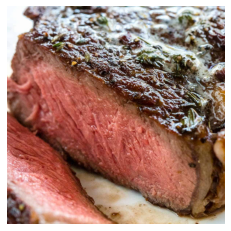

In [46]:
steak=imread('how-to-reverse-sear-a-steak-11-1200.jpg')
plt.imshow(steak)
plt.axis('off')

In [47]:
steak_re=tf.expand_dims(steak,axis=0)
print(steak_re.shape)
predicted_steak=food_model_2.predict(steak_re)
print(labels[int(np.round(predicted_steak))])

(1, 1200, 1200, 3)
steak


In [48]:
food_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          multiple                  0         
_________________________________________________________________
rescaling (Rescaling)        multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 223, 223, 10)      280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 107, 107, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 10)       

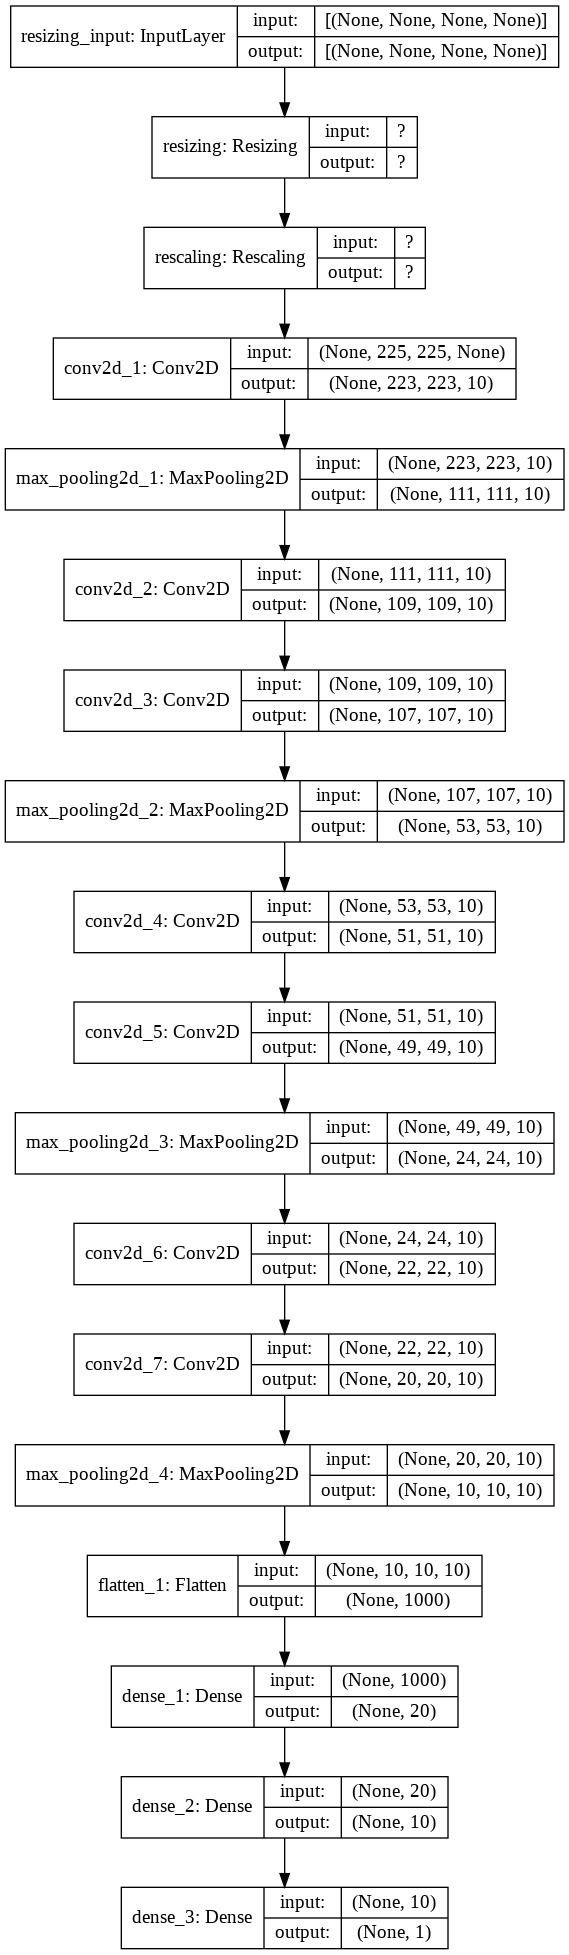

In [51]:
from tensorflow.keras.utils import plot_model
plot_model(food_model_2,show_shapes=True)

In [52]:
food_model_2.save('pizza_vs_streak_model.h5')